In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import mne
from moabb.datasets import BI2013a
from moabb.paradigms import P300


# from mne import Epochs, compute_raw_covariance, compute_covariance
# from mne.preprocessing import Xdawn

from power import field_root_mean_square, plot_fmrs
from data_processing import get_clean_epochs, SpatialFilter, \
                            initialize_weights, apply_weights, \
                            compute_lags, apply_lags

In [3]:
dataset=BI2013a()
dataset.subject_list

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [4]:
epochs = get_clean_epochs(dataset, subjects_list=[1])

C:\Users\isaco\envs\tudim\Lib\site-packages\moabb\datasets\preprocessing.py:279: UserWarning: warnEpochs <Epochs | 480 events (all good), 0 – 1 s (baseline off), ~30.1 MB, data loaded,
 'Target': 80
 'NonTarget': 400>
  warn(f"warnEpochs {epochs}")
C:\Users\isaco\envs\tudim\Lib\site-packages\moabb\datasets\preprocessing.py:279: UserWarning: warnEpochs <Epochs | 480 events (all good), 0 – 1 s (baseline off), ~30.1 MB, data loaded,
 'Target': 80
 'NonTarget': 400>
  warn(f"warnEpochs {epochs}")
C:\Users\isaco\envs\tudim\Lib\site-packages\moabb\datasets\preprocessing.py:279: UserWarning: warnEpochs <Epochs | 480 events (all good), 0 – 1 s (baseline off), ~30.1 MB, data loaded,
 'Target': 80
 'NonTarget': 400>
  warn(f"warnEpochs {epochs}")
C:\Users\isaco\envs\tudim\Lib\site-packages\moabb\datasets\preprocessing.py:279: UserWarning: warnEpochs <Epochs | 480 events (all good), 0 – 1 s (baseline off), ~30.1 MB, data loaded,
 'Target': 80
 'NonTarget': 400>
  warn(f"warnEpochs {epochs}")
C:\U

Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns


C:\Users\isaco\envs\tudim\Lib\site-packages\moabb\datasets\preprocessing.py:279: UserWarning: warnEpochs <Epochs | 480 events (all good), 0 – 1 s (baseline off), ~30.1 MB, data loaded,
 'Target': 80
 'NonTarget': 400>
  warn(f"warnEpochs {epochs}")
C:\Users\isaco\envs\tudim\Lib\site-packages\moabb\paradigms\base.py:350: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  X = mne.concatenate_epochs(X)


Adding metadata with 3 columns
3840 matching events found
No baseline correction applied
Dataset median value:  -2.3990550088478453e-07
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'F5', 'AFz']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'F5', 'AFz']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'F5', 'AFz']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'F5', 'AFz']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'F5', 'AFz']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'F5', 'AFz']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'F5', 'AFz']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Reje

Using matplotlib as 2D backend.


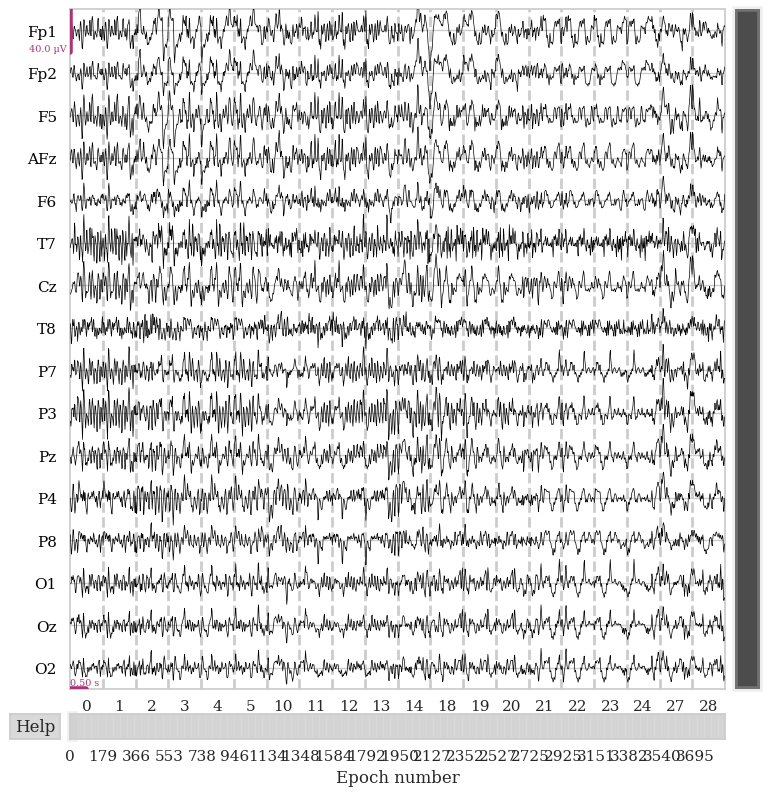

In [5]:
epochs.plot();

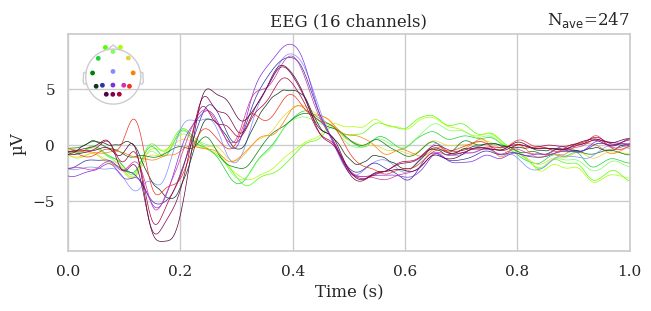

In [6]:
epochs["Target"].average().plot();

No projector specified for this dataset. Please consider the method self.add_proj.


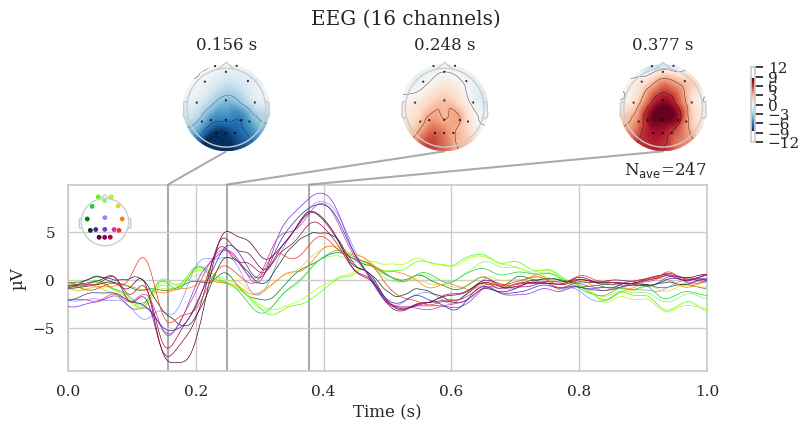

In [7]:
epochs["Target"].average().plot_joint();

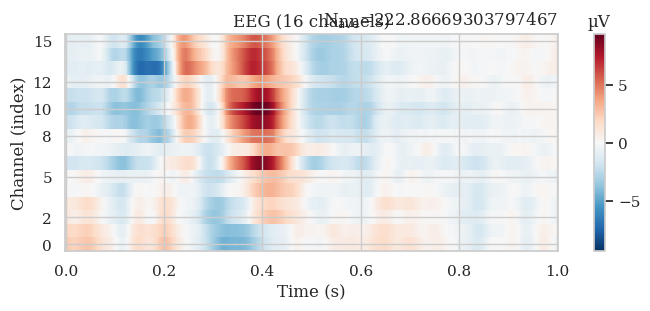

In [8]:
combined_evoked = mne.combine_evoked([epochs["Target"].average(), epochs["NonTarget"].average()], [1,-1])
combined_evoked.plot_image();


<class 'mne.epochs.EpochsArray'>


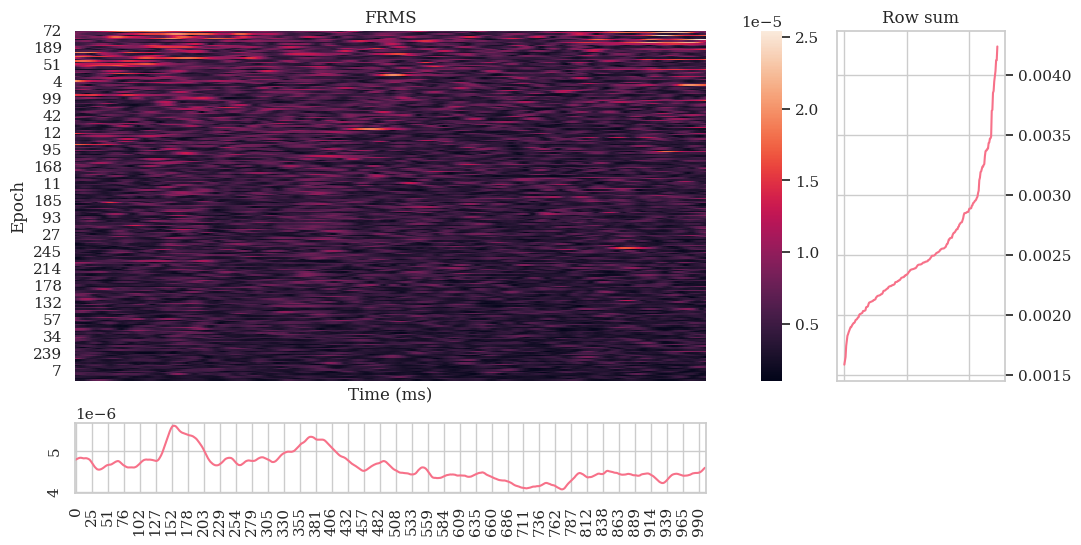

In [9]:
frms = field_root_mean_square(epochs["Target"])
plot_fmrs(frms)

### Apply Spatial Filter

In [10]:
spatial_filter = SpatialFilter(epochs=epochs, p=2)
spatial_filter.fit(class_="Target")
filtered_epochs = spatial_filter.apply(epochs=epochs)

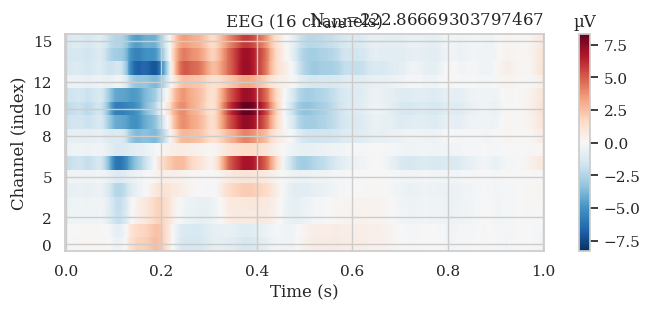

In [11]:
combined_evoked = mne.combine_evoked([filtered_epochs["Target"].average(), filtered_epochs["NonTarget"].average()], [1,-1])
combined_evoked.plot_image();

<class 'mne.epochs.EpochsArray'>


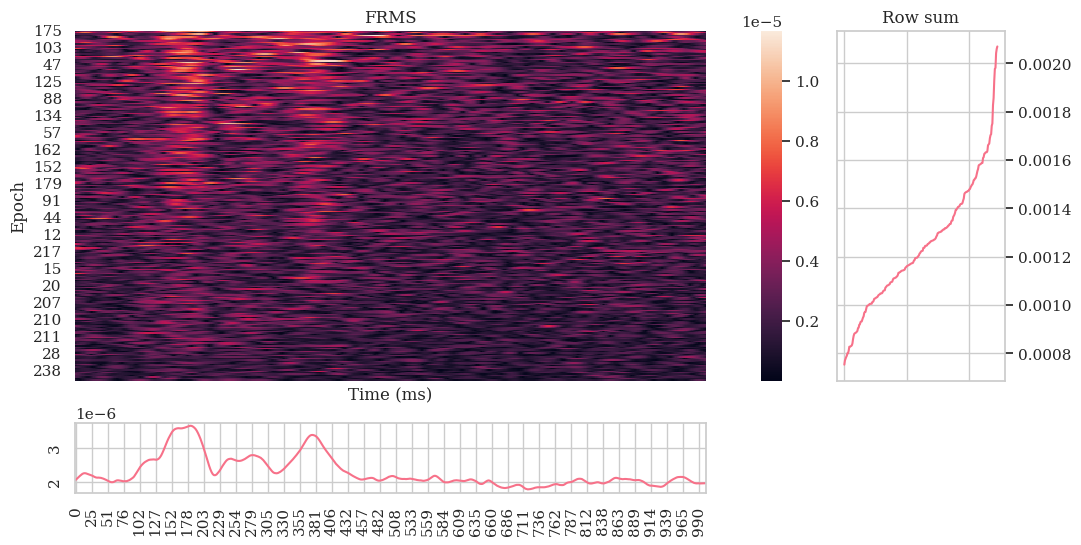

In [12]:
frms = field_root_mean_square(filtered_epochs["Target"])
plot_fmrs(frms)

### Compute and apply Weights

In [13]:
weights_target = initialize_weights(epochs["Target"])
weighted_epochs_target = apply_weights(epochs["Target"], weights_target)
weights_non_target = initialize_weights(epochs["NonTarget"])
weighted_epochs_non_target = apply_weights(epochs["NonTarget"], weights_non_target)

### Compute another spatial filter from scratch to see it gets better

In [14]:
weighted_epochs = mne.concatenate_epochs([weighted_epochs_target, weighted_epochs_non_target])
spatial_filter2 = SpatialFilter(epochs=weighted_epochs, p=2)
spatial_filter.fit(class_="Target")
weighted_filtered_epochs = spatial_filter.apply(epochs=weighted_epochs)

Adding metadata with 3 columns
2528 matching events found
No baseline correction applied


<class 'mne.epochs.EpochsArray'>


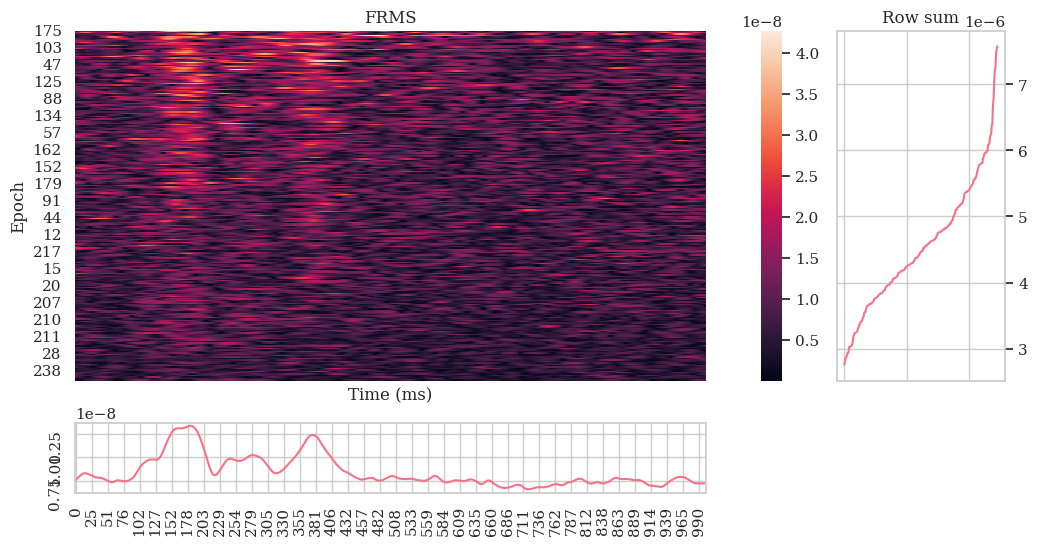

In [15]:
frms = field_root_mean_square(weighted_filtered_epochs["Target"])
plot_fmrs(frms)

### Compute and apply lags

In [19]:
lags_list, cond_hist = compute_lags(weighted_filtered_epochs["Target"], criteria_sim="strict_local_max")

E:  20
Iteration num:  0


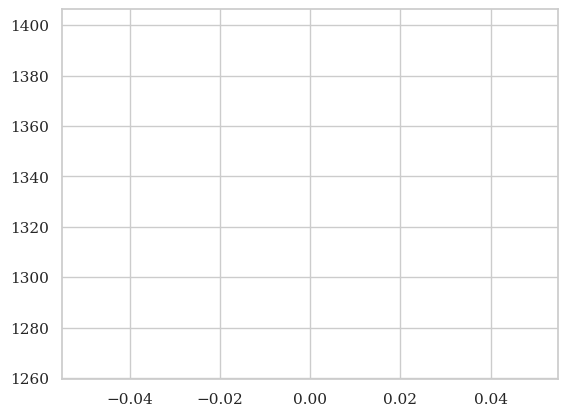

In [52]:
plt.plot(cond_hist)
plt.show()

In [43]:
lags_list2, cond_hist2 = compute_lags(weighted_filtered_epochs["Target"])

E:  20
Iteration num:  0
Iteration num:  1
Iteration num:  2
Iteration num:  3
Iteration num:  4
Iteration num:  5
Iteration num:  6
Iteration num:  7
Iteration num:  8
Iteration num:  9
Iteration num:  10
Iteration num:  11
Iteration num:  12
Iteration num:  13
Iteration num:  14
Iteration num:  15
Iteration num:  16
Iteration num:  17
Iteration num:  18
Iteration num:  19
Iteration num:  20
Iteration num:  21
Iteration num:  22
Iteration num:  23
Iteration num:  24
Iteration num:  25
Iteration num:  26
Iteration num:  27
Iteration num:  28
Iteration num:  29
Iteration num:  30
Iteration num:  31
Iteration num:  32
Iteration num:  33
Iteration num:  34
Iteration num:  35
Iteration num:  36
Iteration num:  37
Iteration num:  38
Iteration num:  39


In [20]:
import math

sfreq = epochs.info['sfreq']
E = math.floor(40*1e-3*sfreq) #Maximum allowed time-shift in samples unit. It should correspond to something around and less than 40ms 
weighted_filtered_lagged_epochs = apply_lags(weighted_filtered_epochs["Target"], E, lags_list)

<class 'mne.epochs.EpochsArray'>


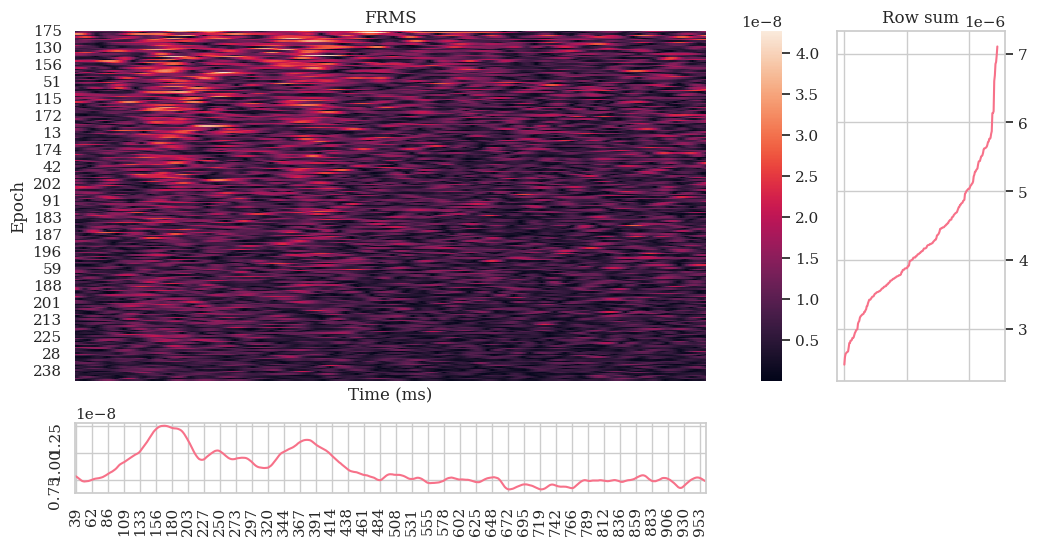

In [21]:
frms = field_root_mean_square(weighted_filtered_lagged_epochs)
plot_fmrs(frms)

In [35]:
len(weighted_filtered_lagged_epochs.times), len(epochs.times)

(473, 513)